# Submetric 2: Safest Neighborhoods

##### The following code reads through the Pittsburgh Police Firearm Seizure dataset as a csv file

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Pittsburgh_Police_Firearm_Seizures.csv")
df

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,6-Apr,40.417619,-79.986436
1,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,16-Jan,40.456904,-80.052328
2,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,10-Feb,40.441185,-79.968527
3,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,14-Jan,40.479530,-80.033477
4,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,"3400 BLOCK CLEARFIELD ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2022,2,6,Windgap,2.0,28.0,4.200356e+10,5.0,6,16-Jan,40.451806,-80.071299
4121,"LEMINGTON AVE & HIGHLAND DR PITTSBURGH, PA 15206",1,0,1,0,0,0,2022,2,6,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,5,18-Mar,40.474031,-79.904440
4122,"N LANG AVE & MONTICELLO ST PITTSBURGH, PA 15208",1,0,0,1,0,0,2022,2,6,Homewood North,9.0,13.0,4.200313e+10,2.0,5,17-Mar,40.459727,-79.897825
4123,"BROWNSVILLE RD & CRAILO AVE PITTSBURGH, PA 15210",1,0,1,0,0,0,2022,2,6,Carrick,4.0,29.0,4.200329e+10,3.0,3,12-Apr,40.396698,-79.987669


In [11]:
df.describe()

,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,council_district,ward,tract,public_works_division,latitude,longitude
count,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,4125.000000,3444.000000,3452.000000,3.565000e+03,3452.000000,3565.000000,3565.000000
mean,1.272970,0.025697,0.945212,0.155152,0.093091,0.053818,2018.085576,6.364848,3.166303,5.206156,16.546640,4.200324e+10,2.784473,40.445357,-79.968776
std,1.475851,0.275616,0.867511,0.408061,0.606754,0.284609,2.063657,3.388658,1.904097,2.845301,7.928606,1.919939e+05,1.506640,0.023739,0.053197
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,0.000000,1.000000,0.000000,4.200301e+10,0.000000,40.324597,-80.220566
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2016.000000,3.000000,2.000000,3.000000,12.000000,4.200312e+10,2.000000,40.428593,-80.006983
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2018.000000,6.000000,3.000000,6.000000,16.000000,4.200319e+10,2.000000,40.452675,-79.980799
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2020.000000,9.000000,5.000000,9.000000,24.000000,4.200329e+10,3.000000,40.461283,-79.922175
max,55.000000,14.000000,30.000000,6.000000,22.000000,7.000000,2022.000000,12.000000,6.000000,9.000000,32.000000,4.200398e+10,6.000000,40.521782,-79.784811


In [12]:
df.isnull().sum()

address                    0
total_count                0
other_count                0
pistol_count               0
revolver_count             0
rifle_count                0
shotgun_count              0
year                       0
month                      0
dow                        0
neighborhood             673
council_district         681
ward                     673
tract                    560
public_works_division    673
police_zone                1
fire_zone                639
latitude                 560
longitude                560
dtype: int64

In [13]:
df_impt_cols = df[["address","total_count","year","neighborhood"]]

In [14]:
df_impt_cols

,address,total_count,year,neighborhood
0,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,2015,Mount Oliver Borough
1,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,2015,Sheraden
2,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,2015,Terrace Village
3,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,2015,Brighton Heights
4,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,2015,NaN
...,...,...,...,...
4120,"3400 BLOCK CLEARFIELD ST PITTSBURGH, PA 15204",1,2022,Windgap
4121,"LEMINGTON AVE & HIGHLAND DR PITTSBURGH, PA 15206",1,2022,Lincoln-Lemington-Belmar
4122,"N LANG AVE & MONTICELLO ST PITTSBURGH, PA 15208",1,2022,Homewood North
4123,"BROWNSVILLE RD & CRAILO AVE PITTSBURGH, PA 15210",1,2022,Carrick


In [15]:
df_clean = df_impt_cols[df_impt_cols["neighborhood"].isnull() == 0]
df_clean

,address,total_count,year,neighborhood
0,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,2015,Mount Oliver Borough
1,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,2015,Sheraden
2,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,2015,Terrace Village
3,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,2015,Brighton Heights
5,"1900 BLOCK 5TH AVE PITTSBURGH, PA 15219",1,2015,Westwood
...,...,...,...,...
4120,"3400 BLOCK CLEARFIELD ST PITTSBURGH, PA 15204",1,2022,Windgap
4121,"LEMINGTON AVE & HIGHLAND DR PITTSBURGH, PA 15206",1,2022,Lincoln-Lemington-Belmar
4122,"N LANG AVE & MONTICELLO ST PITTSBURGH, PA 15208",1,2022,Homewood North
4123,"BROWNSVILLE RD & CRAILO AVE PITTSBURGH, PA 15210",1,2022,Carrick


In [16]:
df_clean[["neighborhood"]].value_counts()

neighborhood    
Homewood South      226
South Side Flats    154
Homewood North      124
Carrick             109
Hazelwood           106
                   ... 
Regent Square         3
Friendship            3
Mt. Oliver            3
Summer Hill           2
Swisshelm Park        1
Length: 88, dtype: int64

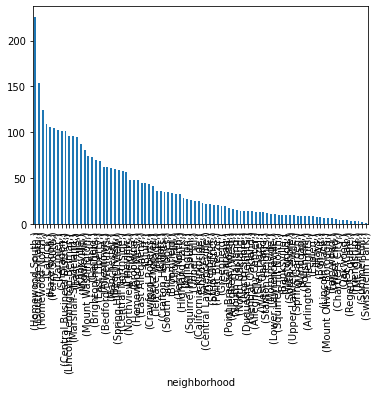

In [17]:
df_clean[["neighborhood"]].value_counts().plot(kind ='bar')

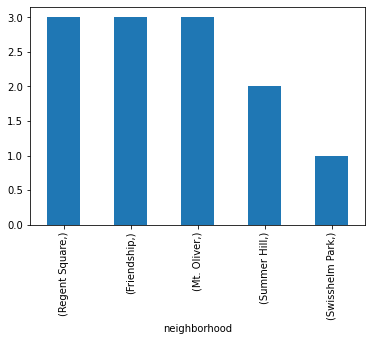

In [18]:
top = df_clean[["neighborhood"]].value_counts().tail(5)
top.plot(kind = 'bar')

### The top 5 best neighborhoods based on Firearm seizure are the neigborhoods above. We can go further by looking at the Firearm Seizure by year

In [19]:
df_clean[["year"]].value_counts()

year
2017    563
2021    552
2019    501
2015    491
2016    468
2018    439
2020    378
2022     60
dtype: int64

In [20]:
df_clean1 = df_clean.drop(df_clean[df_clean['year']!=2015].index)
df_clean1

,address,total_count,year,neighborhood
0,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,2015,Mount Oliver Borough
1,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,2015,Sheraden
2,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,2015,Terrace Village
3,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,2015,Brighton Heights
5,"1900 BLOCK 5TH AVE PITTSBURGH, PA 15219",1,2015,Westwood
...,...,...,...,...
555,"1300 BLOCK CHICAGO ST PITTSBURGH, PA 15214",2,2015,Northview Heights
556,"JOSEPHINE ST & SALISBURY ST PITTSBURGH, PA 15210",1,2015,South Side Slopes
557,"700 BLOCK MT PLEASANT RD PITTSBURGH, PA 15214",1,2015,Northview Heights
559,"500 BLOCK PAULSON AVE PITTSBURGH, PA 15206",1,2015,Larimer


In [21]:
df_clean1[["neighborhood"]].value_counts()

neighborhood        
Homewood South          32
Homewood North          28
Larimer                 26
Marshall-Shadeland      18
Perry South             17
                        ..
Chartiers City           1
Central Oakland          1
Mount Oliver Borough     1
South Shore              1
Friendship               1
Length: 75, dtype: int64

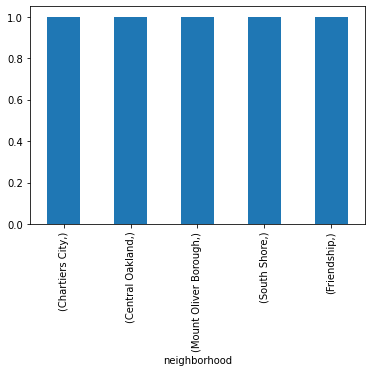

In [24]:
top1 = df_clean1[["neighborhood"]].value_counts().tail(5)
top1.plot(kind = 'bar')

In [25]:
df_clean2 = df_clean.drop(df_clean[df_clean['year']!=2016].index)
df_clean2

,address,total_count,year,neighborhood
562,"KELLY ST & DURANGO WAY PITTSBURGH, PA 15221",1,2016,Homewood South
563,"N DALLAS AVE & BENNETT ST PITTSBURGH, PA 15208",1,2016,Homewood West
564,"700 BLOCK INDUSTRY ST PITTSBURGH, PA 15210",1,2016,Allentown
565,"6600 BLOCK HAMILTON AVE PITTSBURGH, PA 15206",2,2016,Larimer
566,"7300 BLOCK BENNETT ST PITTSBURGH, PA 15208",1,2016,Homewood South
...,...,...,...,...
1116,"2900 BLOCK PENN AVE PITTSBURGH, PA 15201",1,2016,Strip District
1117,"300 BLOCK N AIKEN AVE PITTSBURGH, PA 15206",1,2016,Garfield
1118,"1200 BLOCK BANKSVILLE RD PITTSBURGH, PA 15216",1,2016,Beechview
1119,"BEDFORD AVE & ERIN ST PITTSBURGH, PA 15219",1,2016,Middle Hill


In [26]:
df_clean2[["neighborhood"]].value_counts()

neighborhood             
Homewood South               30
Homewood North               19
Manchester                   18
Central Business District    17
South Side Flats             16
                             ..
Lower Lawrenceville           1
Duquesne Heights              1
Central Lawrenceville         1
Arlington Heights             1
Windgap                       1
Length: 71, dtype: int64

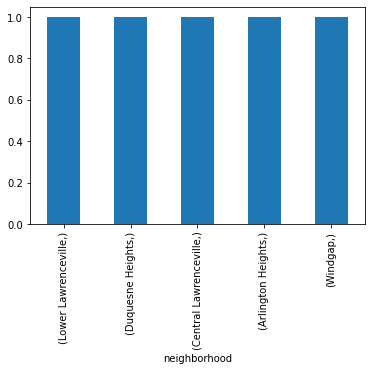

In [27]:
top2 = df_clean2[["neighborhood"]].value_counts().tail(5)
top2.plot(kind = 'bar')

In [28]:
df_clean3 = df_clean.drop(df_clean[df_clean['year']!=2017].index)
df_clean3

,address,total_count,year,neighborhood
1121,"1800 BLOCK E CARSON ST PITTSBURGH, PA 15203",1,2017,South Side Flats
1122,"1800 BLOCK E CARSON ST PITTSBURGH, PA 15203",1,2017,South Side Flats
1123,"6500 BLOCK HAMILTON AVE PITTSBURGH, PA 15206",1,2017,Larimer
1124,"900 BLOCK WESTERN AVE PITTSBURGH, PA 15233",1,2017,Allegheny West
1125,"5900 BLOCK STANTON AVE PITTSBURGH, PA 15206",1,2017,East Liberty
...,...,...,...,...
1784,"6500 BLOCK HAMILTON AVE PITTSBURGH, PA 15206",1,2017,Larimer
1786,"6500 BLOCK HAMILTON AVE PITTSBURGH, PA 15206",1,2017,Larimer
1787,"400 BLOCK MT PLEASANT RD PITTSBURGH, PA 15214",1,2017,Northview Heights
1788,"2600 BLOCK CENTRE AVE PITTSBURGH, PA 15219",1,2017,Middle Hill


In [29]:
df_clean3[["neighborhood"]].value_counts()

neighborhood             
South Side Flats             39
Homewood South               32
Larimer                      28
Central Business District    23
Sheraden                     19
                             ..
Friendship                    1
Glen Hazel                    1
Greenfield                    1
Lincoln Place                 1
Chartiers City                1
Length: 79, dtype: int64

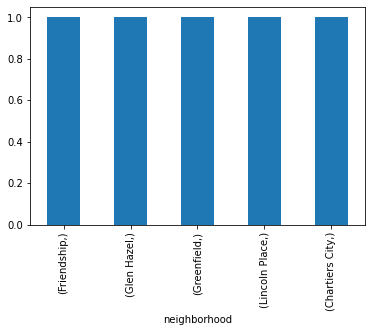

In [30]:
top3 = df_clean3[["neighborhood"]].value_counts().tail(5)
top3.plot(kind = 'bar')

In [31]:
df_clean4 = df_clean.drop(df_clean[df_clean['year']!=2018].index)
df_clean4

,address,total_count,year,neighborhood
1792,"200 BLOCK MARSHALL AVE PITTSBURGH, PA 15214",2,2018,Perry North
1794,"6900 BLOCK FORWARD AVE PITTSBURGH, PA 15217",1,2018,Squirrel Hill South
1795,"1500 BLOCK BRIGHTON RD PITTSBURGH, PA 15212",1,2018,California-Kirkbride
1796,"600 BLOCK CHISLETT ST PITTSBURGH, PA 15206",1,2018,East Liberty
1797,"2ND AVE & WINSTON ST PITTSBURGH, PA 15207",1,2018,Hazelwood
...,...,...,...,...
2316,"3300 BLOCK LIBERTY AVE PITTSBURGH, PA 15201",1,2018,Lower Lawrenceville
2317,"BIRMINGHAM BRG & 5TH AVE PITTSBURGH, PA 15219",1,2018,Bluff
2318,"100 BLOCK REDLYN ST PITTSBURGH, PA 15210",1,2018,Knoxville
2319,"800 BLOCK N MURTLAND ST PITTSBURGH, PA 15208",1,2018,Homewood South


In [32]:
df_clean4[["neighborhood"]].value_counts()

neighborhood    
Homewood South      26
South Side Flats    22
Carrick             15
Hazelwood           15
East Hills          15
                    ..
Allegheny West       1
Duquesne Heights     1
Chartiers City       1
Central Oakland      1
Windgap              1
Length: 77, dtype: int64

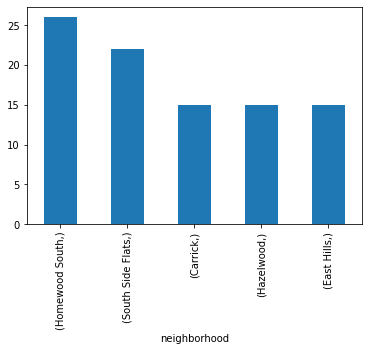

In [22]:
top4 = df_clean4[["neighborhood"]].value_counts().(5)
top4.plot(kind = 'bar')

In [23]:
df_clean5 = df_clean.drop(df_clean[df_clean['year']!=2019].index)
df_clean5

,address,total_count,year,neighborhood,police_zone
2321,"6500 BLOCK HAMILTON AVE PITTSBURGH, PA 15206",1,2019,Larimer,5
2322,"6500 BLOCK HAMILTON AVE PITTSBURGH, PA 15206",1,2019,Larimer,5
2323,"2600 BLOCK PERRYSVILLE AVE PITTSBURGH, PA 15214",1,2019,Perry South,1
2324,"200 BLOCK ADDISON ST PITTSBURGH, PA 15219",1,2019,Terrace Village,2
2325,"S 17TH ST & E CARSON ST PITTSBURGH, PA 15203",2,2019,South Side Flats,3
...,...,...,...,...,...
2905,"1600 BLOCK SPRING GARDEN AVE PITTSBURGH, PA 15212",1,2019,Spring Garden,1
2907,"1900 BLOCK JANCEY ST PITTSBURGH, PA 15206",1,2019,Morningside,5
2908,"N LANG AVE & IDLEWILD ST PITTSBURGH, PA 15208",1,2019,Homewood North,5
2909,"3100 BLOCK FREDERICK ST PITTSBURGH, PA 15212",1,2019,Marshall-Shadeland,1


In [24]:
df_clean5[["neighborhood"]].value_counts()

neighborhood        
Homewood South          34
Hazelwood               23
Homewood North          23
Perry South             22
Carrick                 20
                        ..
Friendship               1
Glen Hazel               1
South Shore              1
Mount Oliver Borough     1
Westwood                 1
Length: 77, dtype: int64

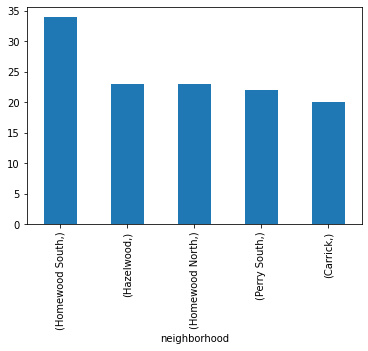

In [25]:
top5 = df_clean5[["neighborhood"]].value_counts().head(5)
top5.plot(kind = 'bar')

In [26]:
df_clean6 = df_clean.drop(df_clean[df_clean['year']!=2020].index)
df_clean6

,address,total_count,year,neighborhood,police_zone
2913,"BRUSHTON AVE & KELLY ST PITTSBURGH, PA 15221",1,2020,Homewood South,5
2914,"900 BLOCK BAY RIDGE AVE PITTSBURGH, PA 15226",1,2020,Brookline,6
2919,"2100 BLOCK WATSON ST PITTSBURGH, PA 15219",1,2020,Overbrook,3
2921,"RODMAN ST & MANETTO WAY PITTSBURGH, PA 15206",1,2020,East Liberty,5
2922,"100 BLOCK RHINE PL PITTSBURGH, PA 15212",2,2020,Spring Hill-City View,1
...,...,...,...,...,...
3385,"700 BLOCK MT PLEASANT RD PITTSBURGH, PA 15214",1,2020,Northview Heights,1
3386,"ARCH ST & JACKSONIA ST PITTSBURGH, PA 15212",1,2020,Central Northside,1
3387,"300 BLOCK N BRADDOCK AVE PITTSBURGH, PA 15208",1,2020,Point Breeze North,4
3388,"900 BLOCK MELLON ST PITTSBURGH, PA 15206",1,2020,Highland Park,5


In [27]:
df_clean6[["neighborhood"]].value_counts()

neighborhood             
Homewood South               20
Lincoln-Lemington-Belmar     18
Carrick                      18
Perry South                  16
Central Business District    13
                             ..
Mount Oliver Borough          1
Esplen                        1
Chateau                       1
Chartiers City                1
Windgap                       1
Length: 73, dtype: int64

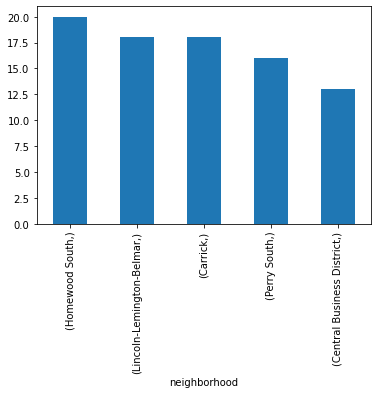

In [28]:
top6 = df_clean6[["neighborhood"]].value_counts().head(5)
top6.plot(kind = 'bar')

In [29]:
df_clean7 = df_clean.drop(df_clean[df_clean['year']!=2021].index)
df_clean7

,address,total_count,year,neighborhood,police_zone
3392,"BENNETT ST & STERRETT ST PITTSBURGH, PA 15208",1,2021,Homewood South,5
3393,"2800 BLOCK SHADELAND AVE PITTSBURGH, PA 15212",1,2021,Marshall-Shadeland,1
3394,"1000 BLOCK BENTON AVE PITTSBURGH, PA 15212",1,2021,Brighton Heights,1
3395,"WOODLAND AVE & PLOUGH ST PITTSBURGH, PA 15212",1,2021,Marshall-Shadeland,1
3396,"3100 BLOCK EWART DR PITTSBURGH, PA 15219",1,2021,Upper Hill,2
...,...,...,...,...,...
4046,"BRIGHTON RD & N CHARLES ST PITTSBURGH, PA 15212",1,2021,California-Kirkbride,1
4047,"6900 BLOCK STANDISH ST PITTSBURGH, PA 15206",1,2021,Morningside,5
4048,"300 BLOCK ORCHARD PL PITTSBURGH, PA 15210",7,2021,Knoxville,3
4049,"2100 BLOCK BROWNSVILLE RD PITTSBURGH, PA 15210",1,2021,Carrick,3


In [30]:
df_clean7[["neighborhood"]].value_counts()

neighborhood       
Homewood South         45
South Side Flats       33
East Hills             31
Homewood North         27
Sheraden               17
                       ..
Spring Garden           1
Squirrel Hill North     1
Allegheny West          1
Highland Park           1
Chateau                 1
Length: 74, dtype: int64

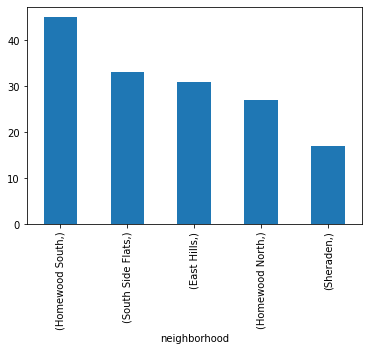

In [31]:
top7 = df_clean7[["neighborhood"]].value_counts().head(5)
top7.plot(kind = 'bar')

In [32]:
df_clean8 = df_clean.drop(df_clean[df_clean['year']!=2022].index)
df_clean8

,address,total_count,year,neighborhood,police_zone
4051,"4900 BLOCK DEARBORN ST PITTSBURGH, PA 15224",2,2022,Garfield,5
4053,"5TH AVE & GIST ST PITTSBURGH, PA 15219",1,2022,Crawford-Roberts,2
4055,"2500 BLOCK BEDFORD AVE PITTSBURGH, PA 15219",1,2022,Bedford Dwellings,2
4056,"FRANKSTOWN AVE & N LANG AVE PITTSBURGH, PA 15208",1,2022,Homewood South,5
4057,"5TH AVE & BIRMINGHAM BRG PITTSBURGH, PA 15219",1,2022,Bluff,2
4059,"100 BLOCK 6TH ST PITTSBURGH, PA 15222",1,2022,Central Business District,2
4060,"300 BLOCK MINTON ST PITTSBURGH, PA 15204",1,2022,Sheraden,6
4061,"1000 BLOCK N MURTLAND ST PITTSBURGH, PA 15208",1,2022,Homewood North,5
4062,"200 BLOCK MARLAND ST PITTSBURGH, PA 15210",1,2022,Knoxville,3
4063,"300 BLOCK MARSHALL RD PITTSBURGH, PA 15214",1,2022,Perry South,1


In [33]:
df_clean8[["neighborhood"]].value_counts()

neighborhood             
Homewood South               7
Perry South                  4
Mount Washington             3
Beechview                    3
Knoxville                    3
Homewood North               3
Sheraden                     3
East Allegheny               2
Marshall-Shadeland           2
Hazelwood                    2
Middle Hill                  2
Lincoln-Lemington-Belmar     2
East Hills                   2
Carrick                      2
Brookline                    2
North Shore                  1
Lincoln Place                1
Shadyside                    1
Spring Hill-City View        1
West Oakland                 1
Allentown                    1
Highland Park                1
Larimer                      1
Bedford Dwellings            1
Garfield                     1
Fineview                     1
Fairywood                    1
Duquesne Heights             1
Crawford-Roberts             1
Central Lawrenceville        1
Central Business District    1
Bluff        

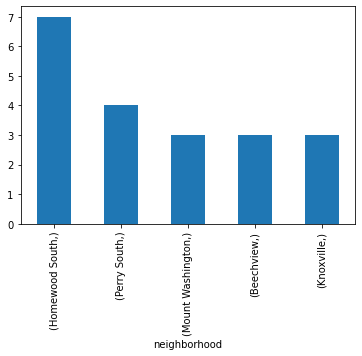

In [34]:
top8 = df_clean8[["neighborhood"]].value_counts().head(5)
top8.plot(kind = 'bar')